# NLE Assignment 1: Books vs DVDs

In this assignment, you will be investigating NLP methods for distinguishing reviews written about books from reviews written about DVDs.

For assessment, you are expected to complete and submit this notebook file.  When answers require code, you may import and use library functions (unless explicitly told otherwise).  All of your own code should be included in the notebook rather than imported from elsewhere.  Written answers should also be included in the notebook.  You should insert as many extra cells as you want and change the type between code and markdown as appropriate.

In order to avoid misconduct, you should not talk about the assignment questions with your peers.  If you are not sure what a question is asking you to do or have any other questions, please ask me or one of the Teaching Assistants.

Marking guidelines are provided as a separate document.

The first few cells contain code to set-up the assignment and bring in some data.   In order to provide unique datasets for analysis by different students, you must enter your candidate number in the following cell.  Otherwise do not change the code in these cells.

In [239]:
candidateno=198397 #this MUST be updated to your candidate number so that you get a unique data sample


In [240]:
#set up drives for resources.  Change the path as necessary

from google.colab import drive
#mount google drive
drive.mount('/content/drive/')
import sys
sys.path.append('/content/drive/My Drive/NLE Notebooks/resources/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [241]:
#do not change the code in this cell
#preliminary imports

#for setting up training and testing data
from sussex_nltk.corpus_readers import AmazonReviewCorpusReader
import random

#set up nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#useful other tools
import re
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
from itertools import zip_longest


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [242]:
#do not change the code in this cell
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the 
            pair is a list of the training data and the second is a list of the test data.
    """
    
    data = list(data)  
    n = len(data)  
    train_indices = random.sample(range(n), int(n * ratio))          
    test_indices = list(set(range(n)) - set(train_indices))    
    train = [data[i] for i in train_indices]           
    test = [data[i] for i in test_indices]             
    return (train, test)                       
 

def feature_extract(review):
    """
    Generate a feature representation for a review
    :param review: AmazonReview object
    :return: dictionary of Boolean features
    """
    return {word:True for word in review.words()}

def get_training_test_data(categories=('book','dvd'),ratio=0.7,seed=candidateno):
    """
    Get training and test data for a given pair of categories and ratio, pre-formatted for use with NB classifier
    :param category: pair of categories of review corpus, two from ["kitchen, "dvd, "book", "electronics"]
    :param ratio: proportion of data to use as training data
    :return: pair of lists 
    """
    random.seed(candidateno)

    train_data=[]
    test_data=[]
    for category in categories:
      reader=AmazonReviewCorpusReader().category(category)    
      train, test = split_data(reader.documents(),ratio=ratio)
   
      train_data+=[(feature_extract(review),category)for review in train]
      test_data+=[(feature_extract(review),category)for review in test]
    random.shuffle(train_data)
    random.shuffle(test_data)

    return train_data,test_data

When you have run the cell below, your unique training and testing samples will be stored in `training_data` and `testing_data`

In [243]:
#do not change the code in this cell
training_data,testing_data=get_training_test_data()
print("The amount of training data is {}".format(len(training_data)))
print("The amount of testing data is {}".format(len(testing_data)))
print("The representation of a single data item is below")
print(training_data[0])

The amount of training data is 6526
The amount of testing data is 2799
The representation of a single data item is below
({'Excellent': True, 'job': True, 'done': True, 'by': True, 'Mr.': True, 'Utterback': True, '.': True, 'I': True, 'had': True, 'this': True, 'book': True, 'for': True, 'a': True, 'class': True, 'in': True, 'master': True, "'s": True, 'degree': True, 'was': True, 'very': True, 'impressed': True, 'and': True, 'found': True, 'that': True, 'it': True, 'huge': True, 'impact': True, 'on': True, 'me': True, 'am': True, 'not': True, 'reader': True, ',': True, 'but': True, 'myself': True, 'really': True, 'engrossed': True, 'One': True, 'of': True, 'the': True, 'few': True, '``': True, 'textbooks': True, 'still': True, 'recommend': True, 'to': True, 'friends': True, 'family': True, 'It': True, 'helped': True, 'understand': True, 'investing': True, 'too': True, 'have': True, 'an': True, 'understanding': True, 'now': True, 'when': True, 'industries': True, 'are': True, 'mature':

 1) Use your training data to find
a) the top 20 words which occur more frequently in book reviews than in dvd reviews
b) the top 20 words which occur more frequently in dvd reviews than book reviews
Discuss what pre-processing techniques you have applied (or not applied) in answering this question, and why. [20%]

In [244]:
import operator
dvd_train={}
book_train={}
stop = stopwords.words('english')
for review in training_data:  
  for category in review:
    for words in category: 
      if review[-1] == "dvd": 
        if words in dvd_train:
          dvd_train[words] += 1
        else:
          dvd_train.update({words: 1}) 
          
      if review[-1] == "book":  
        if words in book_train:
          book_train[words] +=1 
        else:
          book_train.update({words:1}) 
          

  

normalisedvd = {key.lower():value for key,value in dvd_train.items()}
filtereddvd = {key:value for key,value in normalisedvd.items() if key not in stop and key.isalpha()}
dvdseveral = {key:value for key,value in filtereddvd.items() if value > 2}
sorteddvd = dict( sorted(dvdseveral.items(), key=operator.itemgetter(1), reverse=True))
normalisebook = {key.lower():value for key,value in book_train.items()}
filteredbook = {key:value for key,value in normalisebook.items() if key not in stop and key.isalpha()}
bookseveral = {key:value for key,value in filteredbook.items() if value > 2}
sortedbook = dict( sorted(bookseveral.items(), key=operator.itemgetter(1), reverse=True))

In [245]:
from nltk.probability import FreqDist
freqdistdvd = FreqDist(sorteddvd)
freqdistbook = FreqDist(sortedbook)

def getwords(primarykeyvalues,negativekeyvalues,topnumber):
    difference=[(word,frequency-negativekeyvalues.get(word,0)) for (word,frequency) in primarykeyvalues.most_common()]
    sortdifference=sorted(difference,key=lambda pair:pair[1],reverse=True)
    return sortdifference[:topnumber]

book_vs_dvd = getwords(freqdistbook,freqdistdvd,20)
dvd_vs_book = getwords(freqdistdvd,freqdistbook,20)

In [246]:
book_vs_dvd_graph = pd.DataFrame( book_vs_dvd, columns=['Word', 'Frequency']) 
index = book_vs_dvd_graph.index
index.name = "1A) Book - DvD top 20"
book_vs_dvd_graph

,Word,Frequency
1A) Book - DvD top 20,,
0,recommend,259
1,understand,178
2,without,174
3,help,168
4,enjoyed,146
5,excellent,135
6,day,134
7,experience,125
8,least,125


In [247]:
dvd_vs_book_graph = pd.DataFrame( dvd_vs_book, columns=['Word', 'Frequency']) 
index = dvd_vs_book_graph.index
index.name = "1B) DvD - Book top 20"
dvd_vs_book_graph

,Word,Frequency
1B) DvD - Book top 20,,
0,making,218
1,else,173
2,seem,168
3,reviews,147
4,idea,127
5,matter,126
6,art,115
7,beginning,107
8,gave,106


**1.** 

> The pre-processing techniques I have used consist of: Case normalisation (to the lowercase), stop word removal, punctuation removal and removal of words used less than twice.


>I used Case normalisation to prevent the use of the same word being split into seperate counts for example a capitalised word such as 'Quickly' and the lower case form 'quickly' are the exact same word with the same meaning but due to the different format would have been overlooked and seen as two different words thus ruining the counter for frequency of the use of the word 'Quickly' which would have ruined results.

>I used stop word removal to take out any non content bearing words such as: 'the', 'so' and 'but'. These words are used very commonly but carry no meaning so counting them would have interfered with results and most likely ended up in a figure of 20 stop words with no context given, by removing these I have ended up with a nice variety of content bearing words.

>Punctuation can interfere with and confuse pre-processing methods. I have removed any forms of punctuation with the isalpha() method as this both removes any punctuation and numbers from the process. Numbers are not relevant to the task at hand as I am required to search for commonly used words. Punctuation can cause a variety of issues when trying to process a corpus, for example when using a comma after a word like this: 'hello,' the comma will be noted and counted as a comma i.e ',' with many forms of punctuation being used, these can quickly add up and will interfere with results by being more commonly used than most words.

>I decided to remove the use of any words used less than twice to create an effect of words used several times. This brings a benefit as it allows for a more efficient search through a corpus as there is less to filter through and when your results are produced there is less keys and values to look through.

2) Design, build and test a word list classifier to classify reviews as being from the book domain or from the dvd domain.  Make sure you discuss 1) how you decide the lengths and contents of the word lists and ii) accuracy, precision and recall of your final classifier.[30%]

In [248]:
from nltk.classify.api import ClassifierI
import random

morecommonbook = getwords(freqdistbook,freqdistdvd,1000)
morecommondvd = getwords(freqdistdvd,freqdistbook,1000)
topwordsbook=[]
topwordsdvd=[]
for t in morecommonbook:
    topwordsbook.append(t[0]) 
for t in morecommondvd:
    topwordsdvd.append(t[0]) 

class simpleclassifier(ClassifierI): 

    def __init__(self, book, dvd): 
        self._book = book 
        self._dvd = dvd 

    def classify(self, words): 
        score = 0

        for word in words:
            if word in self._book:
                score+=1
            if word in self._dvd:
                score-=1
        return "dvd" if score < 0 else "book"

    def batch_classify(self, docs): 
        return [self.classify(doc.words() if hasattr(doc, 'words') else doc) for doc in docs] 

    def labels(self): 
        return ("book", "dvd")

    def train(self,training_data):
      booktrain = [k for k in training_data if k[1] == "book"]
      dvdtrain = [k for k in training_data if k[1] == "dvd"]
      self.book=book_vs_dvd
      self.dvd=dvd_vs_book


classifier = SimpleClassifier(topwordsbook, topwordsdvd)
classifier.classify("this was a really long read but the plot twist at the end was a page turner".split())

'book'

In [249]:
def evaluateclassifier(classifier, book_test_data, dvd_test_data):
  acc = 0
  for review in book_test_data:
    if classifier.classify(review) == "book":
      acc += 1     
  for review in dvd_test_data:
    if classifier.classify(review) == "dvd":
      acc += 1     
  return acc / (len(book_test_data) + len(dvd_test_data))

accuracy = evaluateclassifier(classifier, sortedbook, sorteddvd)
print(accuracy)


0.4862165963431786


In [250]:

classifier.train(training_data)
accuracy = evaluateclassifier(classifier, book_train, dvd_train)
print(accuracy)

0.4753873883944166


1) Design, build and test a word list classifier to classify reviews as being from the book domain or from the dvd domain.  discuss  how you decide the lengths and contents of the word lists 
> I decided the lengths of the word lists through trial and error by testing the accuracy of the classifer with an example sentence such as: 'the film was amazing to watch with my friends'. When using lengths between 100-500 it was ineffective so by doubling it to 1000 and testing with a variety of sentences I found it was accurate everytime I had tested it. Although this makes processing it slower, it provides a more accurate classification.

> I chose the contents of the word lists by using the most commonly used words for the 'book' category and 'dvd' category accordingly. This allowed for the classifier to determine which category the review most likely belonged to. This was done by having the classifier create a score which would increase and decrease depending on the count of words suited to which caegory. Whichever category the score was in favour of was the one the review was presumed to be.

2) Discuss accuracy, precision and recall of your final classifier.
> The accuracy of my simple Classifier is approximately 50% (0.4862165963431786%) This was determined by finding the actual number of reviews in each category which were correct, creating a sum of these and and dividing it by the length of the possible review options to be categorised. This then produces a decimal representation of the percentage of accuracy. Further below i used a confusion matrix graph to help me represent and understand the precison and recall of my classifier. The precision of the cLassifier is approximately: 48%(0.48050632911392405) and the recall of the cLassifier is approximately: 82% (0.8245004344048653). I worked out the precision by 
dividing true positive by (true positive + false positive) or tp/(tp+fp) and I worked out the Recall by dividing the true positive by (true positive + false negative) or tp/(tp+fn). The TP's, TN's, FP's and FN's were all obtained via a confusion matrix. See class ConfusionMatrix() below.

3) Compare the performance of your word list classifier with a Naive Bayes classifier (e.g., from NLTK).  Make sure you discuss the results. [20%]

In [251]:
import math
class NBClassifier:
    
    def __init__(self):
        
        pass
    
    def setwords(self,training_data):
        known=[]
        for doc,label in training_data:
            known+=list(doc.keys())
        self.known= set(known)
    
    def setpriors(self,training_data):
        priors={}
        for (doc,label) in training_data:
            priors[label]=priors.get(label,0)+1
        total=sum(priors.values())
        for key,value in priors.items():
            priors[key]=value/total
        self.priors=priors
        
    def setcondprobs(self,training_data):               
        conds={}
        for(doc,label) in training_data:
            classcond=conds.get(label,{})
            for word in doc.keys():
                classcond[word]=classcond.get(word,0)+1
        
            conds[label]=classcond
    
        for label, classcond in conds.items():
            for word in self.known:
        
                classcond[word]=classcond.get(word,0)+1
            conds[label]=classcond
            
        for label,dist in conds.items():
            total=sum(dist.values())
            conds[label]={key:value/total for (key,value) in dist.items()}
        
        self.conds=conds
    
    def train(self,training_data):
        self.setwords(training_data)
        self.setpriors(training_data)
        self.setcondprobs(training_data)
    
    def classify(self,doc):        
        doc_probs={key:math.log(value) for (key,value) in self.priors.items()}
        for word in doc.keys():
            if word in self.known:
                doc_probs={classlabel:sofar+math.log(self.conds[classlabel].get(word,0)) for (classlabel,sofar) in doc_probs.items()}

        highprob=max(doc_probs.values())
        classes=[c for c in doc_probs.keys() if doc_probs[c]==highprob]
        return random.choice(classes)
    
    def batch_classify(self,docs):
        return [self.classify(doc) for doc in docs]
    

In [252]:
myclassifier=NBClassifier()
myclassifier.train(training_data)
myclassifier.batch_classify(doc for (doc,label) in testing_data)

['dvd',
 'dvd',
 'dvd',
 'dvd',
 'dvd',
 'book',
 'dvd',
 'dvd',
 'dvd',
 'book',
 'dvd',
 'book',
 'dvd',
 'book',
 'dvd',
 'dvd',
 'dvd',
 'dvd',
 'book',
 'dvd',
 'book',
 'dvd',
 'book',
 'dvd',
 'dvd',
 'dvd',
 'book',
 'dvd',
 'book',
 'dvd',
 'book',
 'dvd',
 'dvd',
 'dvd',
 'dvd',
 'dvd',
 'dvd',
 'book',
 'dvd',
 'dvd',
 'book',
 'book',
 'book',
 'dvd',
 'dvd',
 'book',
 'dvd',
 'dvd',
 'dvd',
 'dvd',
 'book',
 'book',
 'dvd',
 'book',
 'book',
 'book',
 'book',
 'dvd',
 'book',
 'dvd',
 'dvd',
 'book',
 'dvd',
 'book',
 'dvd',
 'dvd',
 'dvd',
 'book',
 'dvd',
 'book',
 'book',
 'book',
 'book',
 'dvd',
 'dvd',
 'dvd',
 'dvd',
 'book',
 'dvd',
 'book',
 'dvd',
 'dvd',
 'book',
 'book',
 'dvd',
 'dvd',
 'dvd',
 'dvd',
 'book',
 'dvd',
 'book',
 'book',
 'book',
 'dvd',
 'dvd',
 'book',
 'dvd',
 'book',
 'dvd',
 'book',
 'dvd',
 'dvd',
 'dvd',
 'dvd',
 'dvd',
 'book',
 'dvd',
 'book',
 'dvd',
 'dvd',
 'book',
 'dvd',
 'book',
 'book',
 'dvd',
 'dvd',
 'dvd',
 'dvd',
 'dvd',
 'b

In [253]:
def classifier_evaluate(classifier,test_data):
    
    docs,goldstandard=zip(*test_data) 
    predictions=classifier.batch_classify(docs)
    correct=0
    for (prediction,gold) in zip(predictions,goldstandard):
        if prediction ==gold:
            correct+=1
    return correct/len(test_data)
classifier_evaluate(myclassifier,testing_data)

0.932475884244373

The true positive for the WL Classifier is: 949
The false positive for the WL Classifier is: 1026
The true negative for the WL Classifier is: 622
The false negative for the WL Classifier is: 202

The true positive for the NB Classifier is: 1594
The false positive for the NB Classifier is: 135
The true negative for the NB Classifier is: 1016
The false negative for the NB Classifier is: 54

The accuracy of Word List Classifier classifier is 0.5612718828152912

The accuracy of Naive Bayes Classifier classifier is 0.932475884244373


,0,1
0,Word List Classifier,0.561272
1,Naive Bayes Classifier,0.932476



The precision of the WL CLassifier is: 0.48050632911392405
The recall of the WL CLassifier is: 0.8245004344048653
The f1 of the WL CLassifier is: 0.6071657069737684

The precision of the NB CLassifier is: 0.9219201850780798
The recall of the NB CLassifier is: 0.9672330097087378
The f1 of the NB CLassifier is: 0.9440331655315368


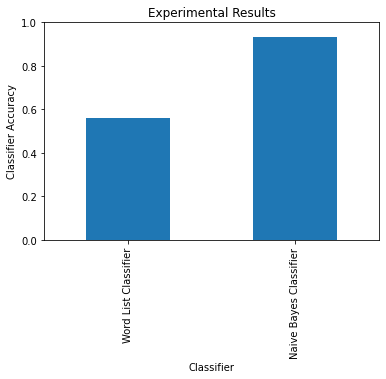

In [254]:
class ConfusionMatrix:
    def __init__(self,predictions,goldstandard,classes=("dvd","book")):
        (self.c1,self.c2)=classes
        self.TP=0
        self.FP=0
        self.FN=0
        self.TN=0
        for p,g in zip(predictions,goldstandard):
            if g==self.c1:
                if p==self.c1:
                    self.TP+=1
                else:
                    self.FN+=1
            
            elif p==self.c1:
                self.FP+=1
            else:
                self.TN+=1
        
    
    def precision(self):
        p=self.TP / (self.TP + self.FP)

        
        return p
    
    def recall(self):
        r=self.TP / (self.TP + self.FN)
        
        return r
    
    def f1(self):
        f1= (2*self.precision()*self.recall()) / (self.precision()+self.recall())
         
        return f1 
docs,labels=zip(*testing_data)
wl_cm=ConfusionMatrix(classifier.batch_classify(docs),labels,("book","dvd"))
print("The true positive for the WL Classifier is: " + str(wl_cm.TP))
print("The false positive for the WL Classifier is: " + str(wl_cm.FP))
print("The true negative for the WL Classifier is: " + str(wl_cm.TN))
print("The false negative for the WL Classifier is: " + str(wl_cm.FN))
docs,labels=zip(*testing_data)
nb_cm=ConfusionMatrix(myclassifier.batch_classify(docs),labels)
print("\nThe true positive for the NB Classifier is: " + str(nb_cm.TP))
print("The false positive for the NB Classifier is: " + str(nb_cm.FP))
print("The true negative for the NB Classifier is: " + str(nb_cm.TN))
print("The false negative for the NB Classifier is: " + str(nb_cm.FN))
word_list_size = 100
classifiers={"Word List Classifier":SimpleClassifier(topwordsbook, topwordsdvd),
             "Naive Bayes Classifier":NBClassifier()}
use=["Word List Classifier","Naive Bayes Classifier"]

results=[]
for name,classifier in classifiers.items():
    if name in use:
        classifier.train(training_data)
        accuracy=classifier_evaluate(classifier,testing_data)
        print("\nThe accuracy of {} classifier is {}".format(name,accuracy))
        results.append((name,accuracy))

      


df = pd.DataFrame(results)
display(df)
ax = df.plot.bar(title="Experimental Results",legend=False,x=0)
ax.set_ylabel("Classifier Accuracy")
ax.set_xlabel("Classifier")
ax.set_ylim(0,1.0)

print("\nThe precision of the WL CLassifier is: " + str(wl_cm.precision()))    
print("The recall of the WL CLassifier is: " + str(wl_cm.recall())) 
print("The f1 of the WL CLassifier is: " + str(wl_cm.f1()))                 
print("\nThe precision of the NB CLassifier is: " + str(nb_cm.precision()))    
print("The recall of the NB CLassifier is: " + str(nb_cm.recall())) 
print("The f1 of the NB CLassifier is: " + str(nb_cm.f1()))          
 

In [255]:
print("\nThe precision of the WL CLassifier is: " + str(wl_cm.precision()))    
print("The recall of the WL CLassifier is: " + str(wl_cm.recall())) 
print("The f1 of the WL CLassifier is: " + str(wl_cm.f1()))                 
print("\nThe precision of the NB CLassifier is: " + str(nb_cm.precision()))    
print("The recall of the NB CLassifier is: " + str(nb_cm.recall())) 
print("The f1 of the NB CLassifier is: " + str(nb_cm.f1()))          


The precision of the WL CLassifier is: 0.48050632911392405
The recall of the WL CLassifier is: 0.8245004344048653
The f1 of the WL CLassifier is: 0.6071657069737684

The precision of the NB CLassifier is: 0.9219201850780798
The recall of the NB CLassifier is: 0.9672330097087378
The f1 of the NB CLassifier is: 0.9440331655315368


3) Compare the performance of your word list classifier with a Naive Bayes classifier (e.g., from NLTK).  Make sure you discuss the results.
> I have used a confusion matrix to produce a visual comparison of the performance between my word list classifier and a Naive Bayes classifier.

> Accuracy is the percentage of predictions a classifier gets correct. The accuracy of Naive Bayes Classifier classifier is around 93%  (0.932475884244373) and the accuracy of Word List Classifier classifier is around 56% (0.5612718828152912) this shows that the accuracy of the NB classifier was significantly higher.  

>The F1 score can be described as an average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The f1 of of the NB CLassifier is around 94% (0.9440331655315368) and the f1 of the WL classifier is around 60% (0.6071657069737684) This shows that the NB classifier was 34% better when it comes to class distribution. Which is vital in real-life classifications.

>Recall is the number of correct results divided by the number of results that should have been returned. The recall of the WL classifier isn't as drastic a difference compared to accuracy and f1 score. The recall of the NB CLassifier is around 96% (0.9672330097087378) and the recall of the WL CLassifier is around 82% (0.8245004344048653). Recall is important when the cost of false negatives is high so overall both classifiers were effective for recall.

>To conclude, it is clear the NB classifier is the better of the classifiers. This is because the NB classifier is alot more thorough and efficient than the simple classifier as it uses priors, and conds. It also uses set words, like the WL classifier. Despite the NB being 'Naive' it just isnt as simple as the WL classifier, so it does a more in depth classification process.

4) Design and carry out an experiment into the impact of the amount of training data on each of these classifiers.  Make sure you describe design decisions in your experiment, include a graph of your results and discuss your conclusions. [30%] 

In [256]:
##This code will word count all of the markdown cells in the notebook saved at filepath
##Running it before providing any answers shows that the questions have a word count of 388

import io
from nbformat import current

filepath="/content/drive/My Drive/NLE Notebooks/assessment/NLEassignment1.ipynb"
question_count=388

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Submission length is 997
